In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
import pickle

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-learn==1.4.2

In [ ]:
df.columns

Index(['id', 'label', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.shape

(455, 32)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.494429e+07,14.213492,19.354374,92.572791,664.583077,0.096372,0.105059,0.089651,0.049590,0.181131,...,16.411787,25.705165,108.253319,900.190549,0.132138,0.256131,0.272104,0.115820,0.288476,0.083636
std,1.387826e+08,3.617912,4.399626,24.993837,362.603052,0.013746,0.051977,0.080264,0.039412,0.027257,...,5.013790,6.289274,34.849813,595.178062,0.022190,0.154821,0.204274,0.067030,0.058845,0.016646
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.695835e+05,11.705000,16.170000,75.085000,421.950000,0.086730,0.065880,0.028860,0.020335,0.162000,...,12.980000,20.970000,83.680000,511.050000,0.117850,0.149650,0.110900,0.064985,0.250800,0.072090
50%,9.059780e+05,13.400000,18.870000,86.870000,551.100000,0.096390,0.096610,0.063870,0.034830,0.179900,...,14.920000,25.270000,97.660000,684.600000,0.131600,0.218600,0.232200,0.101000,0.281500,0.080090
75%,8.910375e+06,16.090000,21.830000,105.400000,801.550000,0.104900,0.130550,0.132350,0.074975,0.194900,...,19.185000,29.915000,126.900000,1122.500000,0.144800,0.341800,0.385700,0.166100,0.315200,0.091950
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.170000,0.291000,0.577400,0.148600


In [ ]:
df.isnull().sum()

id                         0
label                      0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.dtypes

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

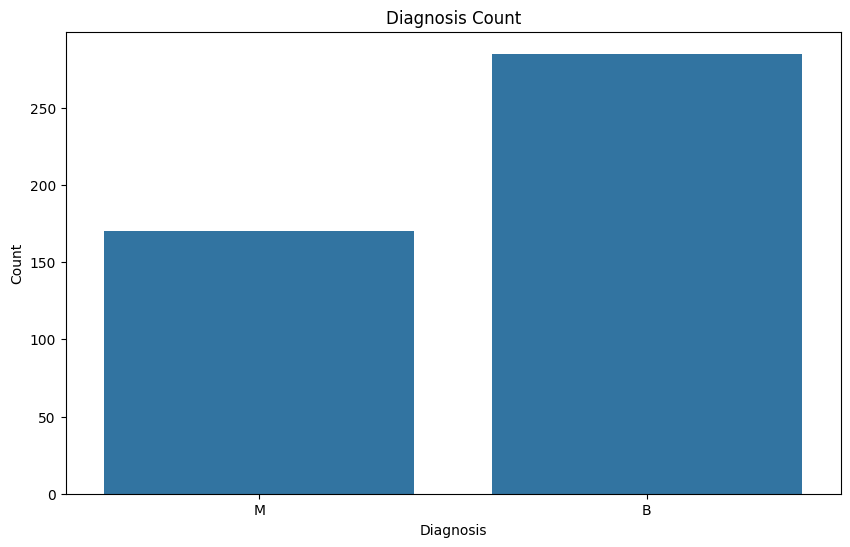

In [ ]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [ ]:
df.label.value_counts()

label
B    285
M    170
Name: count, dtype: int64

In [ ]:
df.label.value_counts()*100/df.shape[0]

label
B    62.637363
M    37.362637
Name: count, dtype: float64

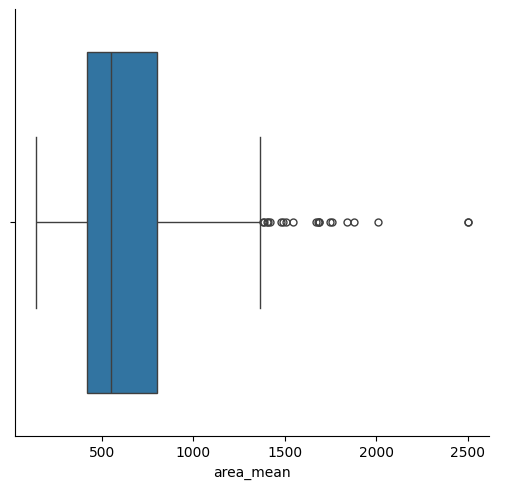

In [ ]:
sns.catplot(x="area_mean", data=df, kind='box')

In [ ]:
df['label'] = df['label'].apply(lambda x: 1 if x=='M' else 0)

In [ ]:
df['label'].unique()

array([1, 0])

In [ ]:
df

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,90524101,1,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
1,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,89346,0,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
3,902975,0,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
4,904969,0,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,866674,1,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,...,22.630,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465
451,869254,0,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,...,11.950,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769
452,859717,1,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,...,23.320,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390
453,88249602,0,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,...,15.330,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617


<Axes: >

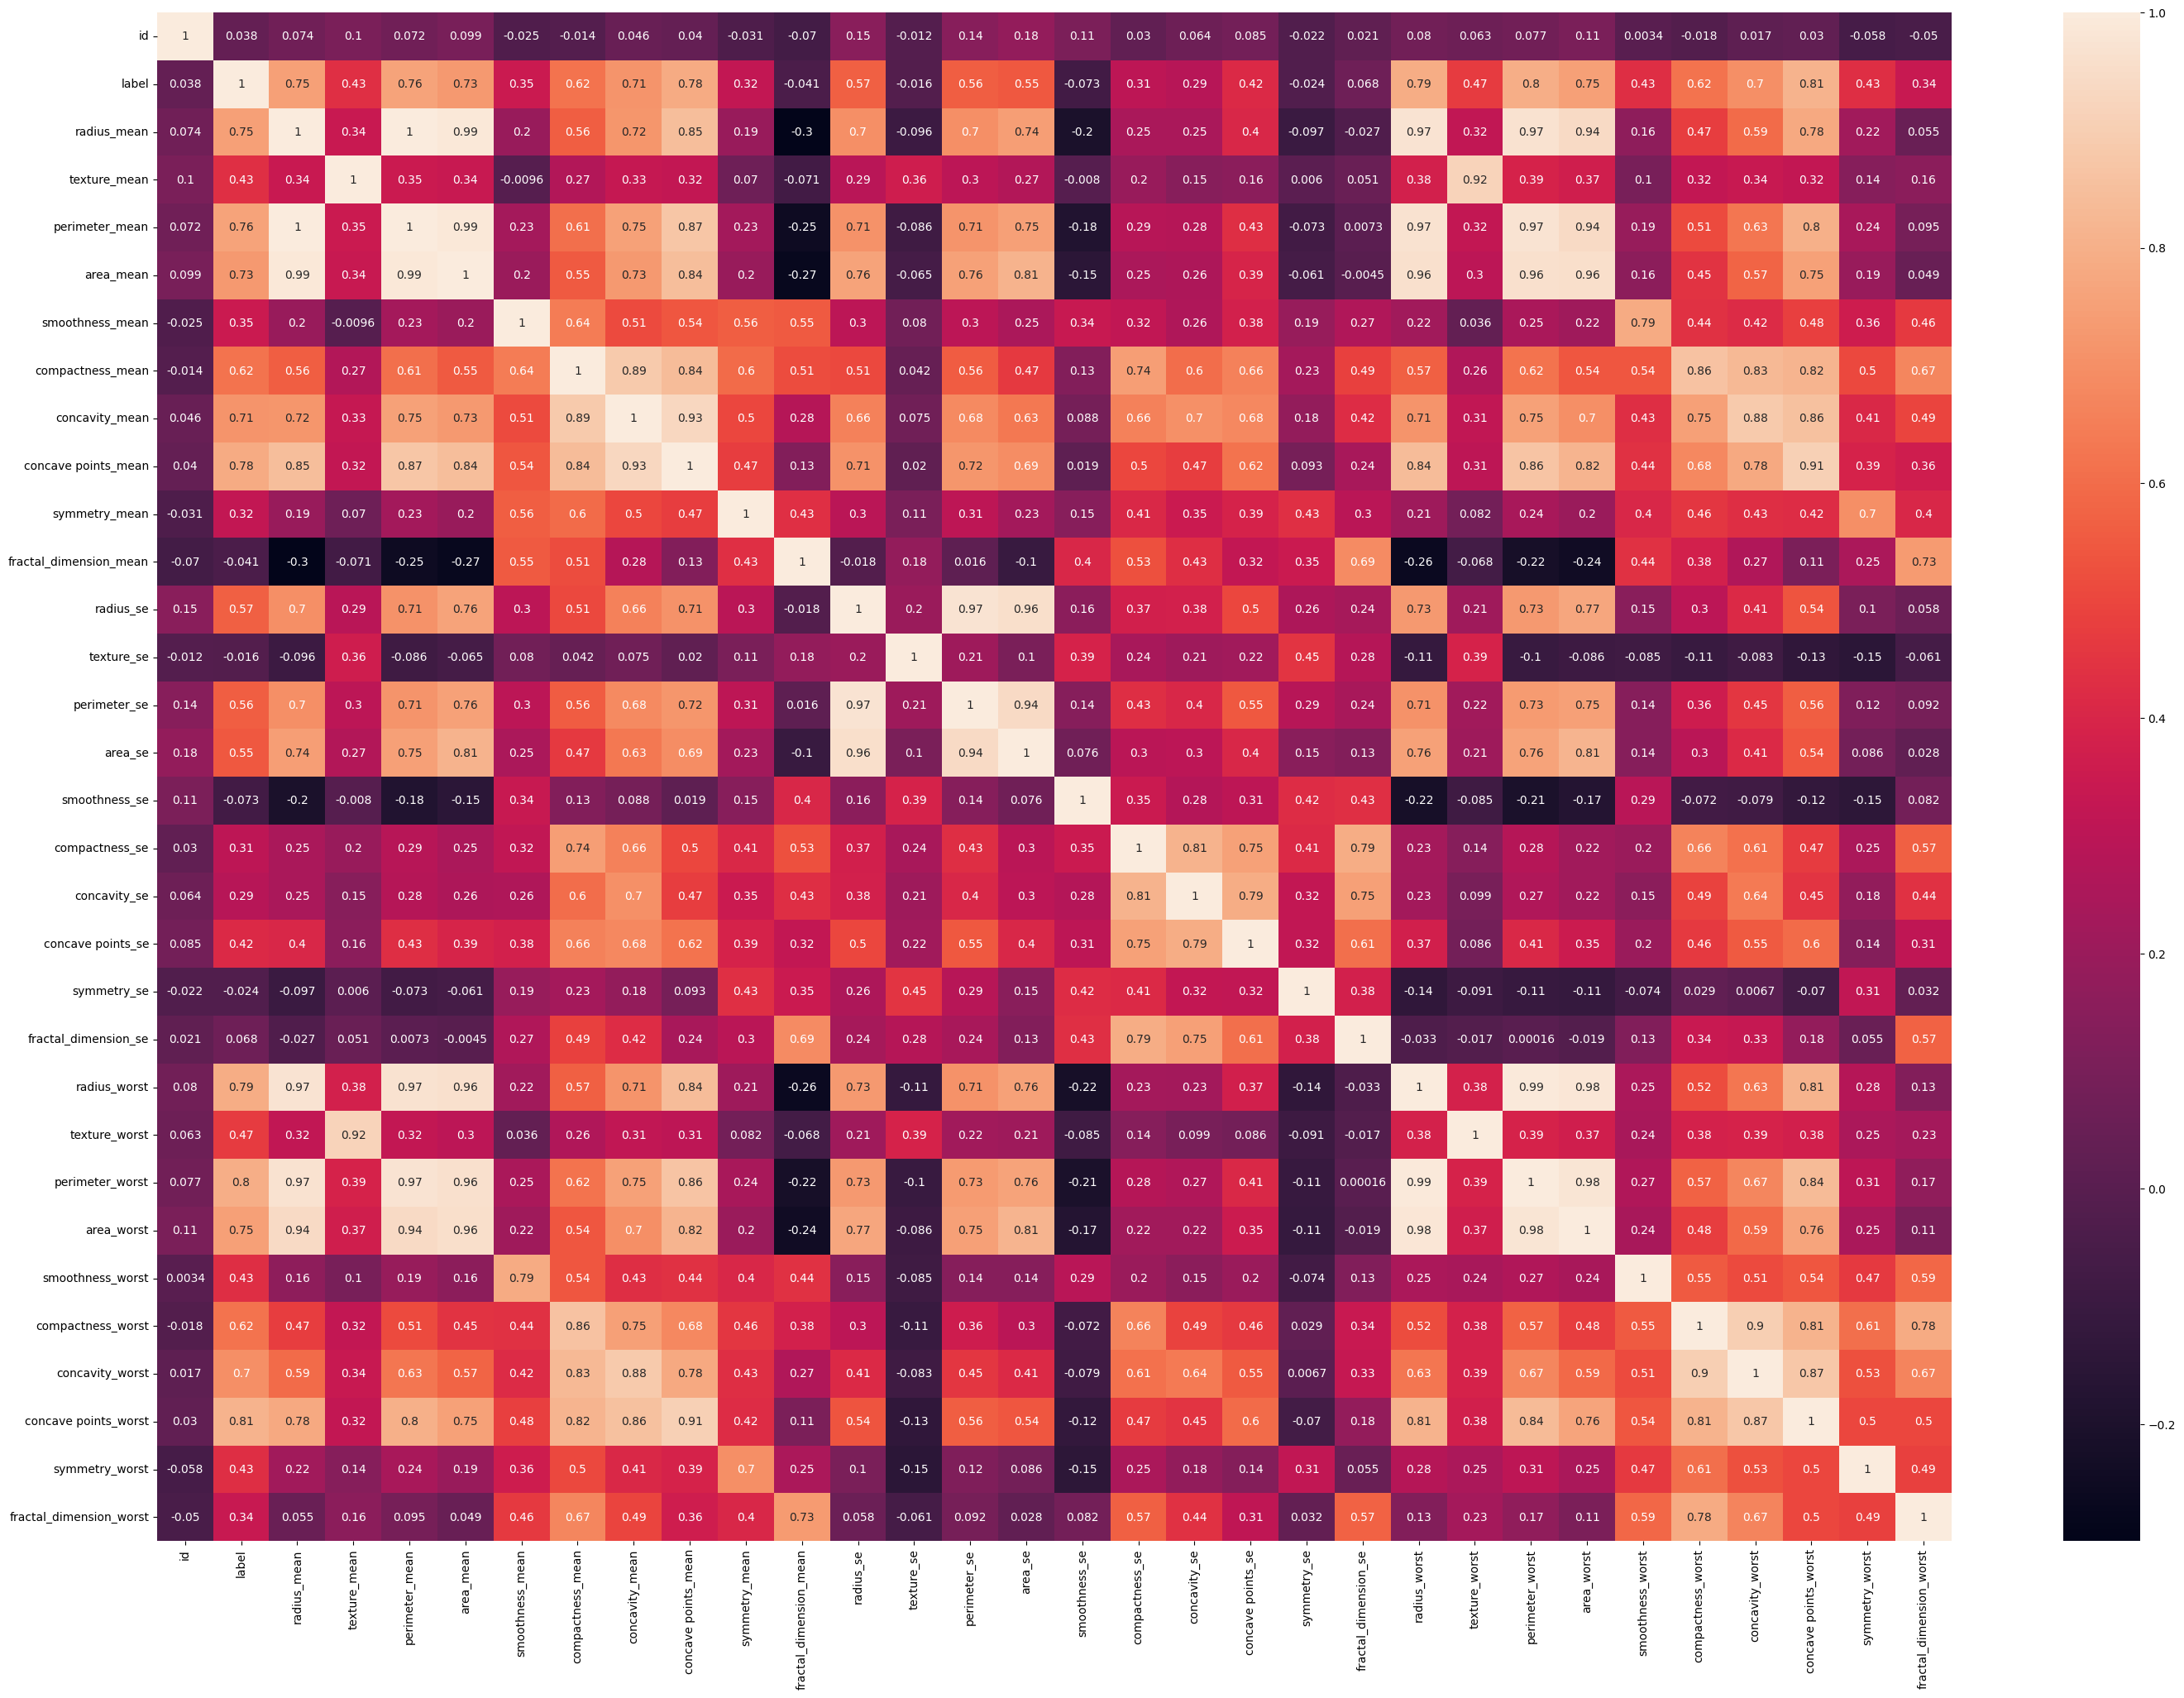

In [ ]:
plt.figure(figsize=(35, 24))
sns.heatmap(df.corr(), annot=True)


In [ ]:
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print("There are", duplicate_rows, "duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


In [ ]:
X = df.iloc[:, 1:]
y = df['label']


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
ordered_rank_features = SelectKBest(score_func=chi2, k=10)
ordered_feature=ordered_rank_features.fit(X,y)

In [ ]:
df_scores = pd.DataFrame(ordered_feature.scores_, columns=['Score'])
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
feature_rank=pd.concat([dfcolumns, df_scores],axis=1)

In [ ]:
feature_rank.columns = ['Feature', 'Score']
feature_rank

,Feature,Score
0,label,285.000000
1,radius_mean,233.845256
2,texture_mean,84.733499
3,perimeter_mean,1761.127029
4,area_mean,47378.425323
5,smoothness_mean,0.107474
6,compactness_mean,4.438657
7,concavity_mean,16.631122
8,concave points_mean,8.705168
9,symmetry_mean,0.196299


In [ ]:
df.columns

Index(['id', 'label', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
feature_rank.nlargest(10, 'Score')

,Feature,Score
24,area_worst,99814.208465
4,area_mean,47378.425323
14,area_se,7650.107014
23,perimeter_worst,3230.375048
3,perimeter_mean,1761.127029
21,radius_worst,433.656079
0,label,285.000000
1,radius_mean,233.845256
13,perimeter_se,215.081106
22,texture_worst,152.959185


In [ ]:
df.drop(['id', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis=1, inplace=True)

In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                 test_size=0.2,
                                                 random_state=111222)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

In [ ]:
clf_RF = RandomForestClassifier(random_state=42)

clf_RF.fit(x_train, y_train)

pred_RF = clf_RF.predict(x_test)
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, pred_RF))
print("Precision:", precision_score(y_test, pred_RF))
print("Recall:", recall_score(y_test, pred_RF))
print("F1 Score:", f1_score(y_test, pred_RF))
print("Average Precision Score:", average_precision_score(y_test, pred_RF))
print()

Random Forest:
Accuracy: 0.9560439560439561
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444
Average Precision Score: 0.9139533306199973



In [ ]:
x_train.columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'perimeter_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst'],
      dtype='object')

In [ ]:
df.describe()

,label,radius_mean,perimeter_mean,area_mean,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.373626,14.213492,92.572791,664.583077,2.914367,41.742297,16.411787,25.705165,108.253319,900.190549
std,0.484299,3.617912,24.993837,362.603052,2.099655,48.554156,5.013790,6.289274,34.849813,595.178062
min,0.000000,6.981000,43.790000,143.500000,0.757000,6.802000,7.930000,12.020000,50.410000,185.200000
25%,0.000000,11.705000,75.085000,421.950000,1.613000,17.885000,12.980000,20.970000,83.680000,511.050000
50%,0.000000,13.400000,86.870000,551.100000,2.312000,24.790000,14.920000,25.270000,97.660000,684.600000
75%,1.000000,16.090000,105.400000,801.550000,3.412000,47.715000,19.185000,29.915000,126.900000,1122.500000
max,1.000000,28.110000,188.500000,2501.000000,21.980000,542.200000,36.040000,49.540000,251.200000,4254.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression()
clf_LR.fit(x_train, y_train)
pred = clf_LR.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pred_LR = clf_LR.predict(x_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, pred_LR))
print("Precision:", precision_score(y_test, pred_LR))
print("Recall:", recall_score(y_test, pred_LR))
print("F1 Score:", f1_score(y_test, pred_LR))
print("Average Precision Score:", average_precision_score(y_test, pred_LR))
print()

Logistic Regression:
Accuracy: 0.945054945054945
Precision: 0.918918918918919
Recall: 0.9444444444444444
F1 Score: 0.9315068493150684
Average Precision Score: 0.8898458898458899



In [ ]:
from xgboost import XGBClassifier
clf_XGB  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf_XGB.fit(x_train, y_train)
pred = clf_XGB.predict(x_test)

In [ ]:
pred_XGB = clf_XGB.predict(x_test)
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, pred_XGB))
print("Precision:", precision_score(y_test, pred_XGB))
print("Recall:", recall_score(y_test, pred_XGB))
print("F1 Score:", f1_score(y_test, pred_XGB))
print("Average Precision Score:", average_precision_score(y_test, pred_XGB))
print()

XGBoost:
Accuracy: 0.9560439560439561
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444
Average Precision Score: 0.9139533306199973



In [ ]:
import pickle

In [ ]:
pickle.dump(clf_RF, open('RandomF_model.pkl', 'wb'))


In [ ]:
model_loaded = pickle.load(open('RandomF_model.pkl', 'rb'))


In [ ]:
model_loaded

RandomForestClassifier(random_state=42)

In [ ]:
predictions = model_loaded.predict(x_test)

In [ ]:
import numpy as np

num_ones = np.count_nonzero(predictions == 1)
num_zeros = np.count_nonzero(predictions == 0)

print("Number of predictions labeled as 1:", num_ones)
print("Number of predictions labeled as 0:", num_zeros)


Number of predictions labeled as 1: 36
Number of predictions labeled as 0: 55


In [ ]:
predictions = model_loaded.predict(x_test)


features_predicted_as_1 = x_test[predictions == 1]

print("Features corresponding to predictions labeled as 1:")
print(features_predicted_as_1)

Features corresponding to predictions labeled as 1:
     radius_mean  perimeter_mean  area_mean  perimeter_se  area_se  \
441        19.73          130.70     1206.0         4.115    92.81   
29         15.22          103.40      716.9         2.362    22.65   
13         16.84          108.40      880.2         3.479    46.61   
432        13.71           90.20      577.9         3.856    50.96   
376        20.16          131.10     1274.0         3.868    74.85   
282        15.28           98.92      710.6         1.344    19.53   
295        19.21          125.50     1152.0         4.837   102.50   
201        21.10          138.10     1384.0         4.542    81.89   
134        20.34          135.90     1264.0         4.012    69.06   
116        14.90          102.10      685.0         3.466    24.19   
245        15.30          102.40      732.4         3.498    43.50   
270        16.46          109.30      832.9         2.482    31.59   
375        22.01          147.20     1

In [ ]:
df.columns

Index(['label', 'radius_mean', 'perimeter_mean', 'area_mean', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst'],
      dtype='object')